# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 700041488

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [226]:
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import os
%matplotlib inline

pd.set_option('mode.chained_assignment', None)    
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset # In the file, attributes are separated by ,

In [227]:
dia_all.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Seperate the inpout (attributes) from target (label)

In [228]:
dia_all = shuffle(dia_all)
dia_all['class'] = dia_all['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)
sourcevars = dia_all.iloc[:,:-1].astype(float) #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

# Your answers
Please clearly highlight each task.

## Task1 [Exploratory data analysis]

## Taks 1.a [Data Processing, Statistic Analysis, Cleaning and Correlation Matrix]

$Helper \thinspace Functions$

In [229]:
def calculate_stats(df, col_name):
    '''
        Returns array of mean and mode of given column
        Arguments:
        df -- pandas dataframe
        col_name -- valid column name of dataframe
    '''
    try:
        mean = df[col_name].mean()
        mode = df[col_name].mode()
    except Exception as err:
        print('Column not found: %s'%col_name)
    mm_array = [mean,mode]
    return mm_array

$Zero \thinspace Replacement$

In [230]:
df = pd.DataFrame()

for col in sourcevars.columns:
    sourcevars[col] = sourcevars[col].mask(sourcevars[col] == 0,calculate_stats(sourcevars, col)[0])

$Data \thinspace Statistics$

In [231]:
dia_all.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


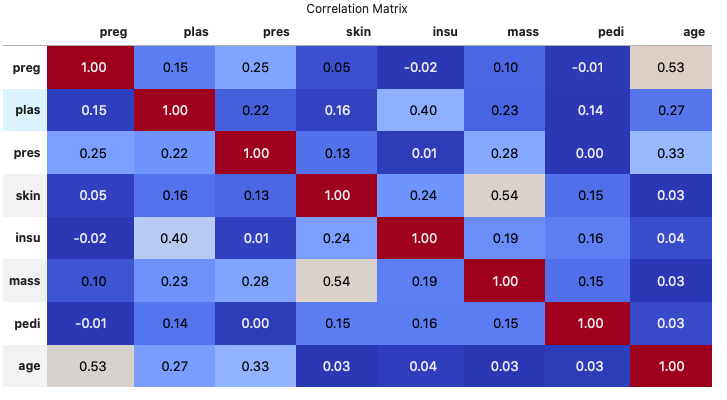

In [246]:
from IPython.display import Image
corr = sourcevars.corr()

fig = corr.style.background_gradient('coolwarm', axis=1).set_properties(**{'max-width': '180px', 'font-size': '10pt', 'padding': "1em 2em"}).set_caption("Correlation Matrix").set_precision(2)
Image(filename='fig.png')

In [76]:
sourcevars.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261
plas,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
pres,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
skin,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
insu,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
mass,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
pedi,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


## Task 1.b [Understand data using grouping and Class Distribution]

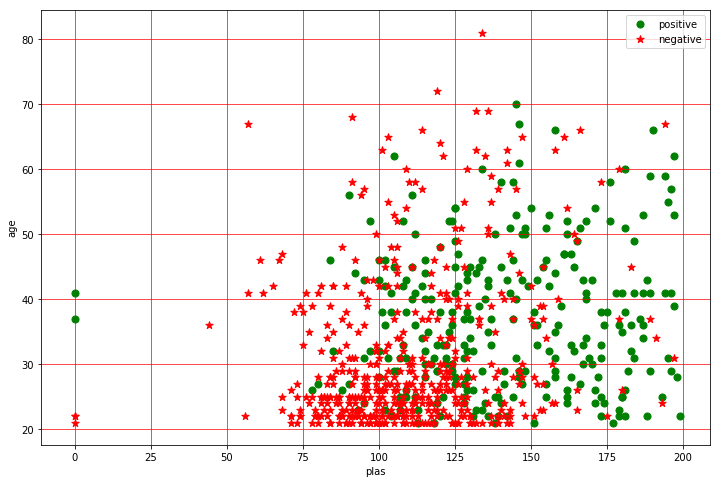

In [179]:
ax = dia_all[dia_all['class']==1].plot.scatter(x='plas', y='age', marker='o', color='green', s=50, label='positive', figsize=(12,8))
dia_all[dia_all['class']==0].plot.scatter(x='plas', y='age', marker='*', color='red', s=60, label='negative', ax=ax)
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')

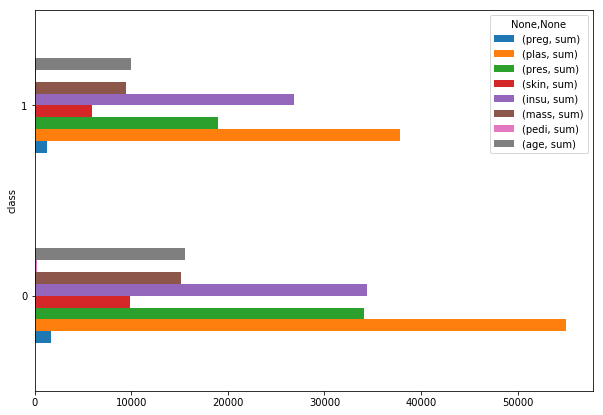

In [183]:
df2 = dia_all.groupby(['class']).agg(['sum'])
df2.plot(kind='barh', stacked=False, figsize=(10,7));

$Check \thinspace for \thinspace distribution \thinspace of \thinspace true \thinspace and \thinspace false \thinspace cases$

In [28]:
num_obs = len(dia_all)
num_true = len(targetvar.loc[targetvar['class'] == 1])
num_false = len(targetvar.loc[targetvar['class'] == 0])

print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print('_________________________________________________')
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
_________________________________________________
Number of False cases: 500 (65.10%)


## Task 2.a [ Classification]

## 2.a.1 Decision Tree (DT) classifier

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np

#### General normalization function

In [136]:
def standardize(X):
    """ Standardize the dataset X """
    X_std = X
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_std = (X - X.mean(axis=0)) / X.std(axis=0)
    return X_std

In [79]:
def split_data(split_test_size = 0.30):
    X = sourcevars
    y = targetvar
    X_train, X_test, y_train, y_test = train_test_split(X,targetvar,test_size=split_test_size, random_state = 0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

Find optimum parameters using Grid Search technique

In [32]:
# Parameter evaluation
treeclf = DecisionTreeClassifier(random_state=42)

parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4]
}

gridsearch=GridSearchCV(treeclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(sourcevars,targetvar)

print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_depth': 6, 'max_features': 4, 'min_samples_split': 3}
0.7736666666666666


In [84]:
X_train, X_test, y_train, y_test = split_data()

tree = DecisionTreeClassifier(max_depth=6,max_features = 4, min_samples_split = 3, random_state = 0)
tree.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.872
Accuracy on test set: 0.766


In [85]:
prediction_from_test_data = tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)

print ("Accuracy of Decision Tree is: {0:0.4f}".format(accuracy))

Accuracy of Decision Tree is: 0.7662


In [86]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 52  25]
 [ 29 125]]


In [87]:
print ("Classification Report")
print('_________________________________________________________')
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
_________________________________________________________
              precision    recall  f1-score   support

           1       0.64      0.68      0.66        77
           0       0.83      0.81      0.82       154

    accuracy                           0.77       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [88]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

y_pred = tree.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('_________________________________________________')
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(metrics.roc_auc_score(y_test,y_pred),5)
print('_________________________________________________')
print ("Confusion Matrix")
print(cm)

TP - True Negative 125
FP - False Positive 29
FN - False Negative 25
TP - True Positive 52
_________________________________________________
Accuracy Rate: 0.7662337662337663
Misclassification Rate: 0.23376623376623376
_________________________________________________
Confusion Matrix
[[125  29]
 [ 25  52]]


## 2.a.2 - Repeat(2.a.1) the experiment 10 times (General function for multiple iterations)

In [89]:
MSE = []
ACCURACY = []
TN, FP, FN, TP = [],[],[],[]
PRECISION = []

for i in range(10):
    random_train_test_split = round(np.random.uniform(0,1),2)
    X_train, X_test, y_train, y_test = split_data(random_train_test_split)
    model = DecisionTreeClassifier(max_depth=7,max_features = 3, min_samples_split = 5, random_state = 0)
    model.fit(X_train,y_train)
    
    prediction_from_test_data = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)
    MSE.append(metrics.mean_squared_error(y_test, prediction_from_test_data))
    cm = confusion_matrix(y_test, prediction_from_test_data)
    precision = metrics.precision_score(prediction_from_test_data, y_test, average='micro')
    
    TN.append(cm[0,0]); FP.append(cm[0,1]); FN.append(cm[1,0]); TP.append(cm[1,1])
    PRECISION.append(precision); ACCURACY.append(accuracy)
    
    print('Running cyle: %s'%str(i))
    print('__________________________________________________________________')
    print('Random Split {}'.format(random_train_test_split))
    print('TN - True Negative {}'.format(cm[0,0]))
    print('FP - False Positive {}'.format(cm[0,1]))
    print('FN - False Negative {}'.format(cm[1,0]))
    print('TP - True Positive {}'.format(cm[1,1]))
    print('Precision of Decision Tree {0:0.4f}'.format(precision))
    print ("Accuracy of Decision Tree {0:0.4f}".format(accuracy))
    print("Test set MSE for {} cycle:{}".format(i+1,MSE[i]))
    print('__________________________________________________________________')
    
    
print("Mean MSE for {}-random split cross validation : {}".format(len(MSE), np.mean(MSE)))
print("Mean Accuracy for {}-random split cross validation : {}".format(len(ACCURACY), np.mean(ACCURACY)))
print("Mean Precision for {}-random split cross validation : {}".format(len(PRECISION), np.mean(PRECISION)))
print("Mean True Negative for {}-random split cross validation : {}".format(len(TN), np.mean(TN)))
print("Mean False Positive for {}-random split cross validation : {}".format(len(FP), np.mean(FP)))
print("Mean False Negative for {}-random split cross validation : {}".format(len(FN), np.mean(FN)))
print("Mean True Positive for {}-random split cross validation : {}".format(len(TP), np.mean(TP)))


Running cyle: 0
__________________________________________________________________
Random Split 0.99
TN - True Negative 404
FP - False Positive 90
FN - False Negative 112
TP - True Positive 155
Precision of Decision Tree 0.7346
Accuracy of Decision Tree 0.7346
Test set MSE for 1 cycle:0.26544021024967146
__________________________________________________________________
Running cyle: 1
__________________________________________________________________
Random Split 0.16
TN - True Negative 61
FP - False Positive 21
FN - False Negative 10
TP - True Positive 31
Precision of Decision Tree 0.7480
Accuracy of Decision Tree 0.7480
Test set MSE for 2 cycle:0.25203252032520324
__________________________________________________________________
Running cyle: 2
__________________________________________________________________
Random Split 0.31
TN - True Negative 128
FP - False Positive 32
FN - False Negative 37
TP - True Positive 42
Precision of Decision Tree 0.7113
Accuracy of Decision Tree 0.711

## 2.b.1 Peformance comparsion between Gini impurity (“gini”) to information gain (“entropy”)

In [90]:
def compare_performance(criterion='gini', max_depth = 7, min_samples_split = 5):
    tree = DecisionTreeClassifier(max_depth=max_depth, max_features = 3, min_samples_split = min_samples_split, random_state=0, criterion=criterion)
    tree.fit(X_train,y_train)
    return [tree.score(X_train,y_train), tree.score(X_test,y_test)]

print('Performance Check on: gini')

train_gini, test_gini = compare_performance(criterion='gini')

print('________________________________________________')
print("Accuracy on training set: {:.3f}".format(train_gini))
print("Accuracy on test set: {:.3f}".format(test_gini))
print('________________________________________________')
print('Performance Check on: entropy')

train_entropy, test_entropy = compare_performance(criterion='entropy')

print('________________________________________________')
print("Accuracy on training set: {:.3f}".format(train_entropy))
print("Accuracy on test set: {:.3f}".format(test_entropy))
print('________________________________________________')

Performance Check on: gini
________________________________________________
Accuracy on training set: 0.868
Accuracy on test set: 0.711
________________________________________________
Performance Check on: entropy
________________________________________________
Accuracy on training set: 0.843
Accuracy on test set: 0.704
________________________________________________


## 2.b.2 Peformance comparsion between Gini impurity (“gini”) to information gain (“entropy”) on random train test split and for 10 iterations

In [91]:
def repeat_experiment(criterion = 'gini'):
    ACCURACY = []
    for i in range(10):
        random_train_test_split = round(np.random.uniform(0,1),2)
        X_train, X_test, y_train, y_test = split_data(random_train_test_split)
        model = DecisionTreeClassifier(max_depth=7,max_features = 3, min_samples_split = 5, random_state = 0)
        model.fit(X_train,y_train)

        prediction_from_test_data = model.predict(X_test)
        ACCURACY.append(metrics.accuracy_score(y_test, prediction_from_test_data))
    return ACCURACY

accuracy_gini = repeat_experiment(criterion='gini')

print("Mean Accuracy gini for {}-random train test cross validation : {}".format(len(accuracy_gini), np.mean(accuracy_gini)))

Mean Accuracy gini for 10-random train test cross validation : 0.6893745870311155


In [92]:
accuracy_entropy = repeat_experiment(criterion='entropy')

print("Mean Accuracy entropy for {}-random train test cross validation : {}".format(len(accuracy_entropy), np.mean(accuracy_entropy)))

Mean Accuracy entropy for 10-random train test cross validation : 0.6967989583165975


## 2.c Performance comparsion between "gini" and "entropy" using chart

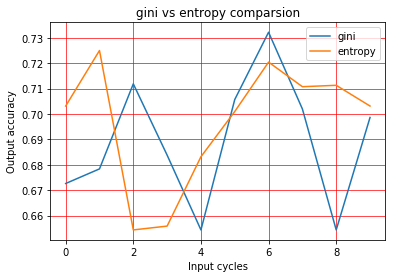

In [180]:
cycles = range(10)
plt.plot(cycles, accuracy_gini, label='gini')
plt.plot(cycles, accuracy_entropy, label='entropy')
plt.title('gini vs entropy comparsion')
plt.xlabel('Input cycles')
plt.ylabel('Output accuracy')
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')
plt.legend()
plt.show()

## 2.d why standardizing helps in improving performance

*Standardizing a dataset in machine learning helps with making the data comparable across tasks and algorithms.There are many data preprocessing steps that could be applied to a dataset, such as data normalization, feature selection, data transformations, and so on. In the given dataset there were some zero values which are kind of outliers in data and hence removing zeros before applying DT algorithm definitely improved the performance. <br>Also when I tried to standardize the dataset using formula*
<br><center>__standardized_data__ $= \frac{data - \mu }{\sigma}$</center>
There was no change in the performance of the model. The reason for that is because the data is highly correlated and is standardized.

## Task 3[Classification parameters DT]

## Task 3.a min_samples_split effect on performance of algorithm

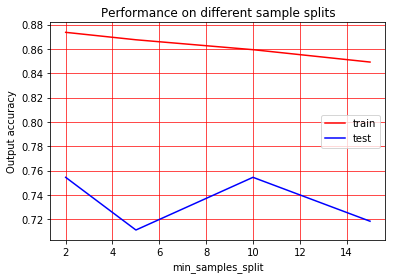

In [181]:
min_samples_split = [2, 5, 10, 15]
acc_comparsion_train = []
acc_comparsion_test = []

for sample in min_samples_split:
    acc_comparsion_train.append(compare_performance(min_samples_split = sample)[0])
    acc_comparsion_test.append(compare_performance(min_samples_split = sample)[1])

plt.plot(min_samples_split, acc_comparsion_train, label='train', color='r')
plt.plot(min_samples_split, acc_comparsion_test, label='test', color='b')
plt.title('Performance on different sample splits')
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')
plt.xlabel('min_samples_split')
plt.ylabel('Output accuracy')
plt.legend()
plt.show()

## Task 3.b max_depth effect on performance of algorithm

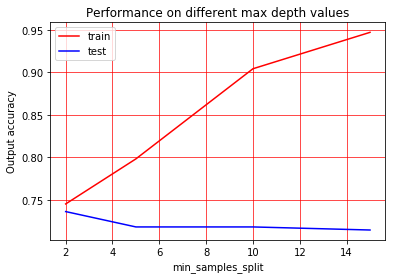

In [182]:
max_depth = [3, 4, 5, 6]
acc_comparsion_train = []
acc_comparsion_test = []

for sample in min_samples_split:
    acc_comparsion_train.append(compare_performance(max_depth = sample)[0])
    acc_comparsion_test.append(compare_performance(max_depth = sample)[1])

plt.plot(min_samples_split, acc_comparsion_train, label='train', color='r')
plt.plot(min_samples_split, acc_comparsion_test, label='test', color='b')
plt.title('Performance on different max depth values')
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')
plt.xlabel('min_samples_split')
plt.ylabel('Output accuracy')
plt.legend()
plt.show()

## Task 4[Decision Tree Boundaries] - Implemented this part to understand decision tree better

DecisionTree Feature ranking:
_________________________________________________
1. feature plas (0.470215)
2. feature age (0.136975)
3. feature mass (0.131788)
4. feature insu (0.066243)
5. feature pedi (0.063821)
6. feature preg (0.057307)
7. feature skin (0.041671)
8. feature pres (0.031980)
_________________________________________________


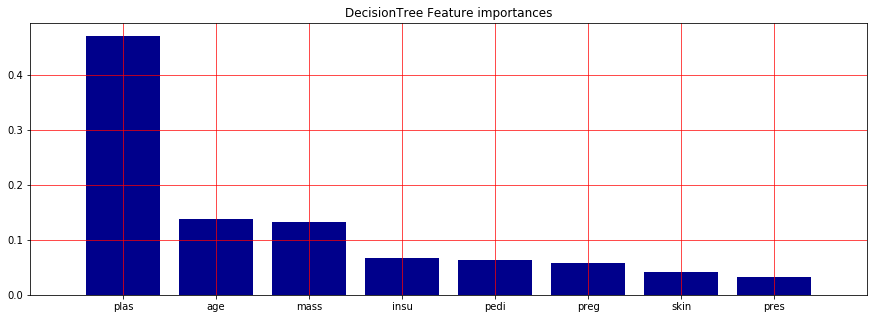

In [96]:
#Feature Importance DecisionTreeClassifier

importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]
feature = X_train
feat_names = sourcevars.columns

print("DecisionTree Feature ranking:")
print('_________________________________________________')

for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))

print('_________________________________________________')

plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(feature.shape[1]), importance[indices], color='#00008B', align="center")
plt.xticks(range(feature.shape[1]), list(feat_names[indices]))
plt.xlim([-1, feature.shape[1]])
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')
plt.show()

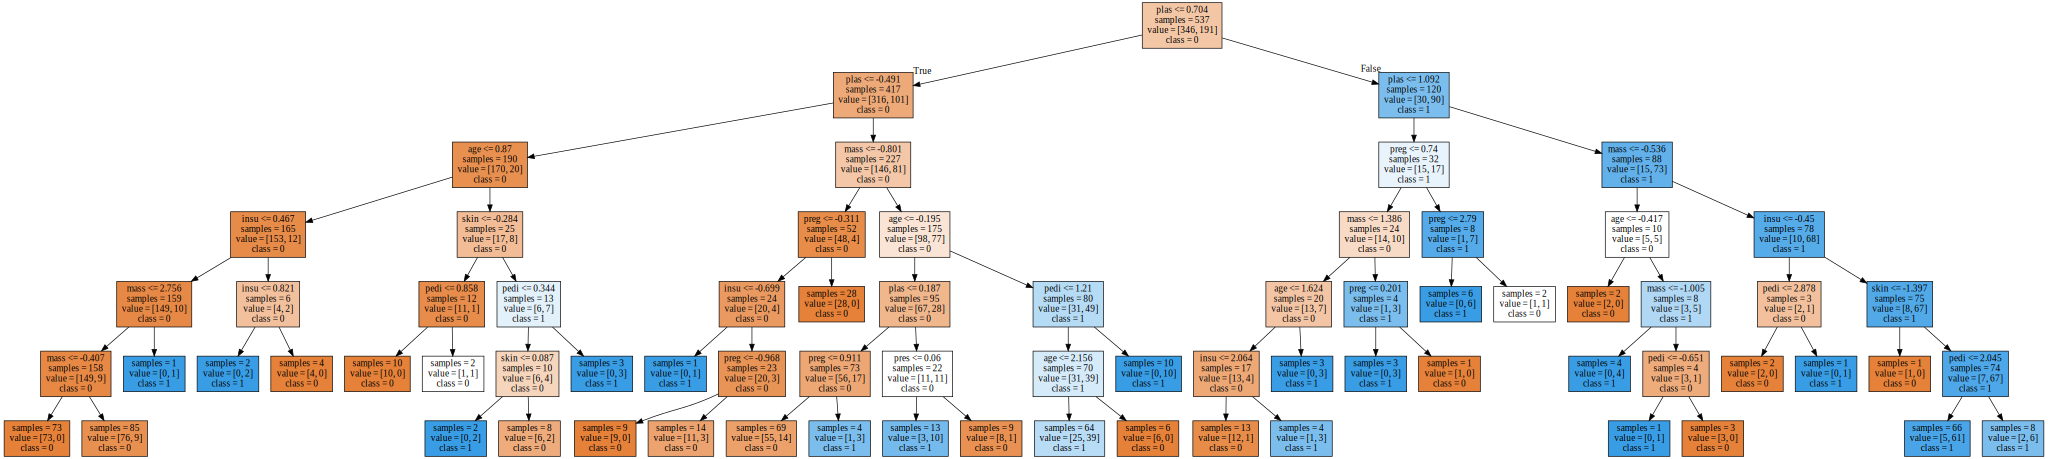

In [97]:
from sklearn.tree import export_graphviz
import graphviz

importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]

export_graphviz(tree,out_file="diabetes_tree.dot",class_names=["0","1"],
feature_names=sourcevars.columns,impurity=False,filled=True)

with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

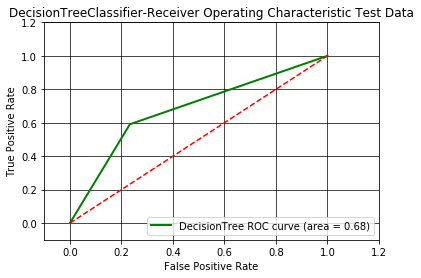

In [98]:
#Evaluation DecisionTreeClassifier

from sklearn.metrics import roc_curve, auc
import random

y_pred = model.predict(X_test)
fpr,tpr,thres = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('DecisionTreeClassifier-Receiver Operating Characteristic Test Data')
plt.plot(fpr, tpr, color='green', lw=2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True, linewidth=0.7, color='black', linestyle='-')
plt.show()